# MedEye3d Walkthrough under various stress testing routines
 ```
__  __          _ _____           _____     _ 
|  \/  | ___  __| | ____|   _  ___|___ /  __| |
| |\/| |/ _ \/ _` |  _|| | | |/ _ \ |_ \ / _` |
| |  | |  __/ (_| | |__| |_| |  __/___) | (_| |
|_|  |_|\___|\__,_|_____\__, |\___|____/ \__,_|
                        |___/
```

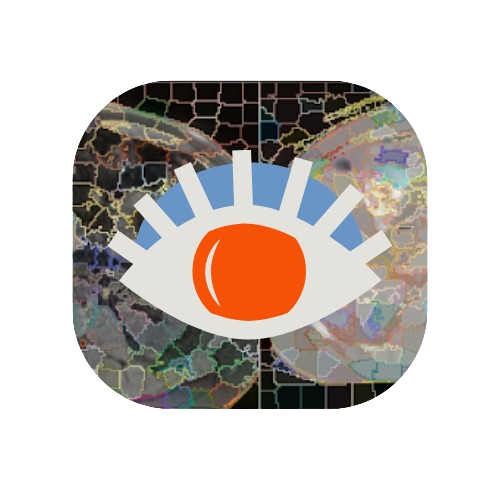

## Make sure to export JULIA_NUM_THREADS=3,1 to run MedEye3d


In [1]:
using Base.Threads
println(nthreads(:default))
println(nthreads(:interactive))

3
1


## Initialization of path variables and function arguments

In [2]:
using MedEye3d
#Data downloaded from the following google drive links :

# https://drive.google.com/file/d/1Segr6BC_ma9bKNmM8lzUBaJLQChkAWKA/view?usp=drive_link
# https://drive.google.com/file/d/1PqHTQXOVTWx0FQSDE0oH4hRKNCE9jCx8/view?usp=drive_link
#modify paths to your downloaded data accordingly
ctNiftiImage = "D:/mingw_installation/home/hurtbadly/Downloads/ct_soft_pat_3_sudy_0.nii.gz"
petNiftiImage = "D:/mingw_installation/home/hurtbadly/Downloads/pet_orig_pat_3_sudy_0.nii.gz"
newImage = "D:/mingw_installation/home/hurtbadly/Downloads/volume-0.nii.gz"
strangeSpacingImage = "D:/mingw_installation/home/hurtbadly/Downloads/Output Volume_1.nii.gz"
extremeTestImage = "D:/mingw_installation/home/hurtbadly/Downloads/extreme_test_one.nii.gz"
bmaNiftiImage = "D:/mingw_installation/home/hurtbadly/Downloads/bma.nii.gz"
h5File = "D:/mingw_installation/home/hurtbadly/Downloads/locc.h5"
h5NiftiImage = "D:/mingw_installation/home/hurtbadly/Downloads/hdf5.nii.gz"
firstDicomImage = "D:\\mingw_installation\\home\\hurtbadly\\Desktop\\julia_stuff\\MedImages.jl\\test_data\\ScalarVolume_0\\"

"""
NOTE : only one type of modality at a time in multi-image is supported.
"""
NOTE = "only one type of modality at a time in multi-image is supported"
@info NOTE

# For Single Image Mode
dicomImageArg = (firstDicomImage,"CT")
petImageArg = (petNiftiImage, "PET")
ctImageArg = (ctNiftiImage, "CT")
h5ImageArg = (h5NiftiImage, "CT")

# -- Overlaid images in SIngle image mode (Requires work)
petOverlaidImagesArg = [ctImageArg, petImageArg]


#For multi image display
dicomImagesArg = [[dicomImageArg],[dicomImageArg]]
petImagesArg = [[petImageArg], [petImageArg]]
ctImagesArg = [[ctImageArg],[ctImageArg]]
h5ImagesArg  =[[h5ImageArg], [h5ImageArg]] 

[ Info: only one type of modality at a time in multi-image is supported


2-element Vector{Vector{Tuple{String, String}}}:
 [("D:/mingw_installation/home/hurtbadly/Downloads/hdf5.nii.gz", "CT")]
 [("D:/mingw_installation/home/hurtbadly/Downloads/hdf5.nii.gz", "CT")]

## Single Image Mode: PET Modality
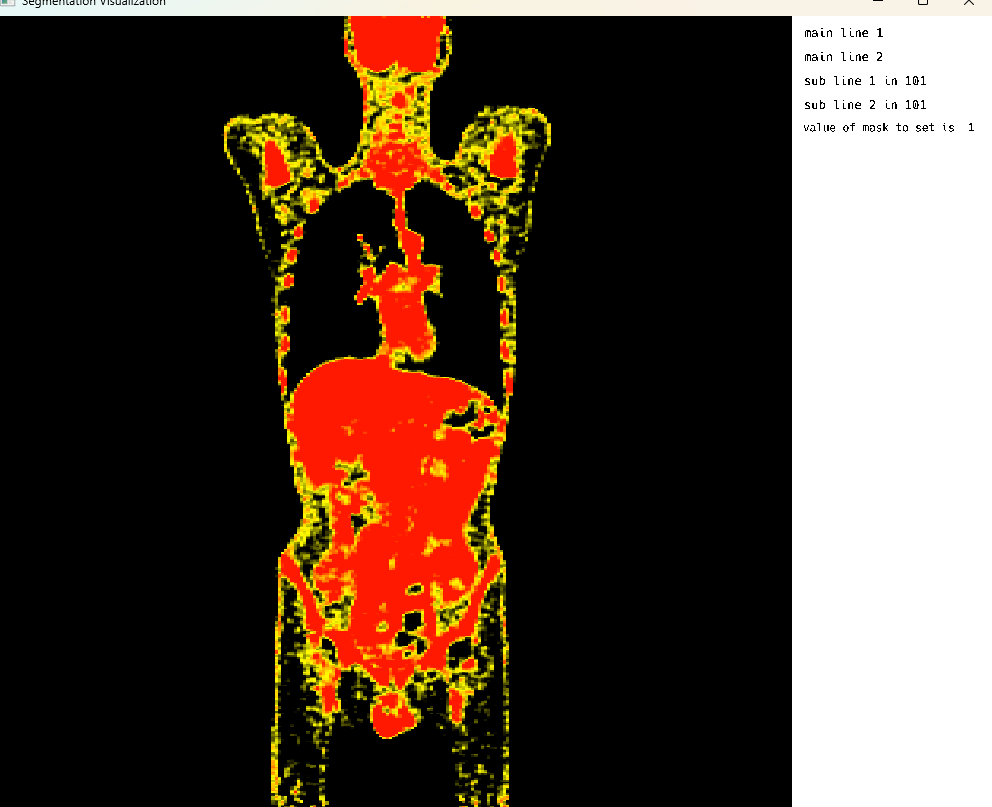

In [4]:
using MedEye3d
medEyeStruct = MedEye3d.SegmentationDisplay.displayImage(petImageArg) #singleImageDisplay

Dict{Symbol, Any}(:gl_version => v"4.6.0", :gl_renderer => "NVIDIA GeForce GTX 1650 SUPER/PCIe/SSE2", :glsl_version => v"4.60.0", :gl_vendor => "NVIDIA Corporation")


[ Info: !! Crosshair rendering is currently only supported in Multi image display mode !!
┌ Warning: Font initialization failed, disabling text rendering: MethodError(FreeTypeAbstraction.FTFont, (), 0x000000000000690a)
└ @ MedEye3d.ForDisplayStructs D:\mingw_installation\home\hurtbadly\Desktop\julia_stuff\sota_medeye\MedEye3d.jl\src\structs\ForDisplayStructs.jl:162


MedEye3d.ForDisplayStructs.MainMedEye3d
  channel: Channel{Any}
  voxelArrayShapes: Array{Tuple{Int64, Int64, Int64}}((2,))
  voxelArrayTypes: Array{Any}((2,))
  textDispObj: MedEye3d.ForDisplayStructs.ForWordsDispStruct
  states: Array{MedEye3d.ForDisplayStructs.StateDataFields}((0,))
  displayMode: MedEye3d.ForDisplayStructs.DisplayMode MedEye3d.ForDisplayStructs.SingleImage


## Single Image Mode: CT Modality

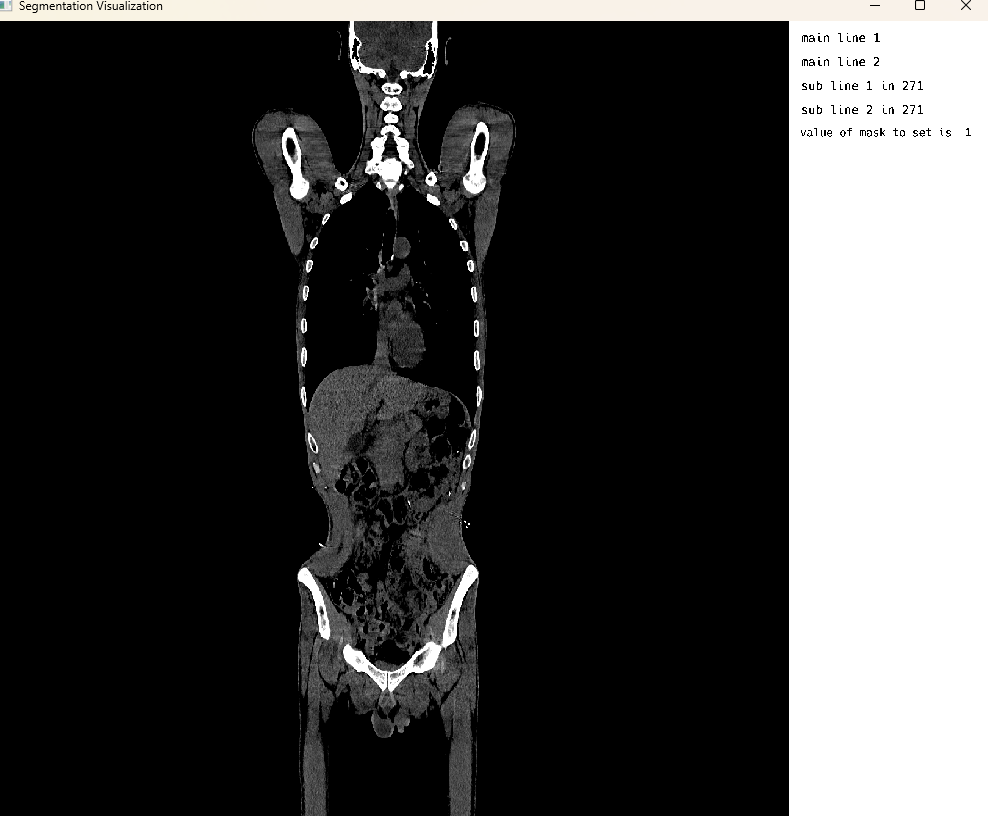

In [5]:
using MedEye3d
medEyeStruct = MedEye3d.SegmentationDisplay.displayImage(ctImageArg) #singleImageDisplay

Dict{Symbol, Any}(:gl_version => v"4.6.0", :gl_renderer => "NVIDIA GeForce GTX 1650 SUPER/PCIe/SSE2", :glsl_version => v"4.60.0", :gl_vendor => "NVIDIA Corporation")


[ Info: !! Crosshair rendering is currently only supported in Multi image display mode !!
┌ Warning: Font initialization failed, disabling text rendering: MethodError(FreeTypeAbstraction.FTFont, (), 0x000000000000690a)
└ @ MedEye3d.ForDisplayStructs D:\mingw_installation\home\hurtbadly\Desktop\julia_stuff\sota_medeye\MedEye3d.jl\src\structs\ForDisplayStructs.jl:162


MedEye3d.ForDisplayStructs.MainMedEye3d
  channel: Channel{Any}
  voxelArrayShapes: Array{Tuple{Int64, Int64, Int64}}((2,))
  voxelArrayTypes: Array{Any}((2,))
  textDispObj: MedEye3d.ForDisplayStructs.ForWordsDispStruct
  states: Array{MedEye3d.ForDisplayStructs.StateDataFields}((0,))
  displayMode: MedEye3d.ForDisplayStructs.DisplayMode MedEye3d.ForDisplayStructs.SingleImage


## Single Image Mode: Dynamic Supervoxels From HDF5 

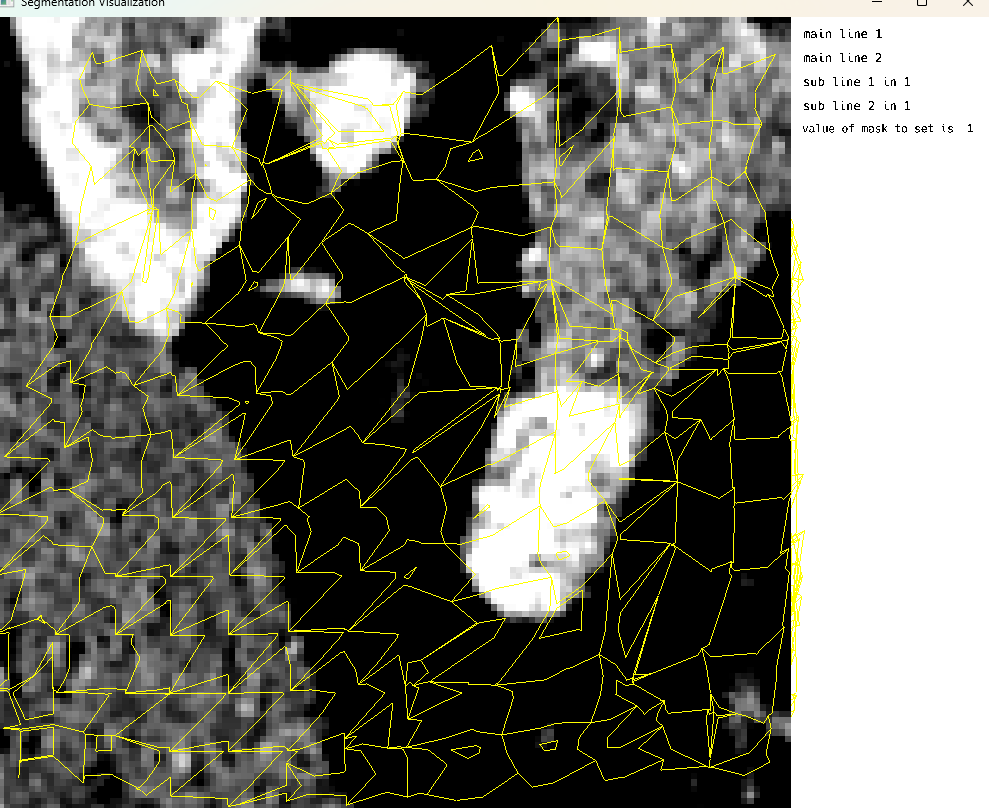

In [6]:
using MedEye3d
# Supervoxels
# For conversion of h5 to nifti
# MedEye3d.ShadersAndVerticiesForSupervoxels.populateNiftiWithH5(ctNiftiImage, h5File, h5NiftiImage)

# for visualization
supervoxelDict = MedEye3d.ShadersAndVerticiesForSupervoxels.processVerticesAndIndicesForSv(h5File, "tetr_dat")
medEyeStruct = MedEye3d.SegmentationDisplay.displayImage(h5ImageArg; all_supervoxels=supervoxelDict)


[ Info: Generating supervoxels for axis 1
[ Info: Generating supervoxels for axis 2
[ Info: Generating supervoxels for axis 3
[ Info: Supervoxels generated for all axes


Dict{Symbol, Any}(:gl_version => v"4.6.0", :gl_renderer => "NVIDIA GeForce GTX 1650 SUPER/PCIe/SSE2", :glsl_version => v"4.60.0", :gl_vendor => "NVIDIA Corporation")


[ Info: !! Crosshair rendering is currently only supported in Multi image display mode !!
┌ Warning: Font initialization failed, disabling text rendering: MethodError(FreeTypeAbstraction.FTFont, (), 0x000000000000690a)
└ @ MedEye3d.ForDisplayStructs D:\mingw_installation\home\hurtbadly\Desktop\julia_stuff\sota_medeye\MedEye3d.jl\src\structs\ForDisplayStructs.jl:162


MedEye3d.ForDisplayStructs.MainMedEye3d
  channel: Channel{Any}
  voxelArrayShapes: Array{Tuple{Int64, Int64, Int64}}((2,))
  voxelArrayTypes: Array{Any}((2,))
  textDispObj: MedEye3d.ForDisplayStructs.ForWordsDispStruct
  states: Array{MedEye3d.ForDisplayStructs.StateDataFields}((0,))
  displayMode: MedEye3d.ForDisplayStructs.DisplayMode MedEye3d.ForDisplayStructs.SingleImage


## Single Image Mode: Modification of Display Data on the screen

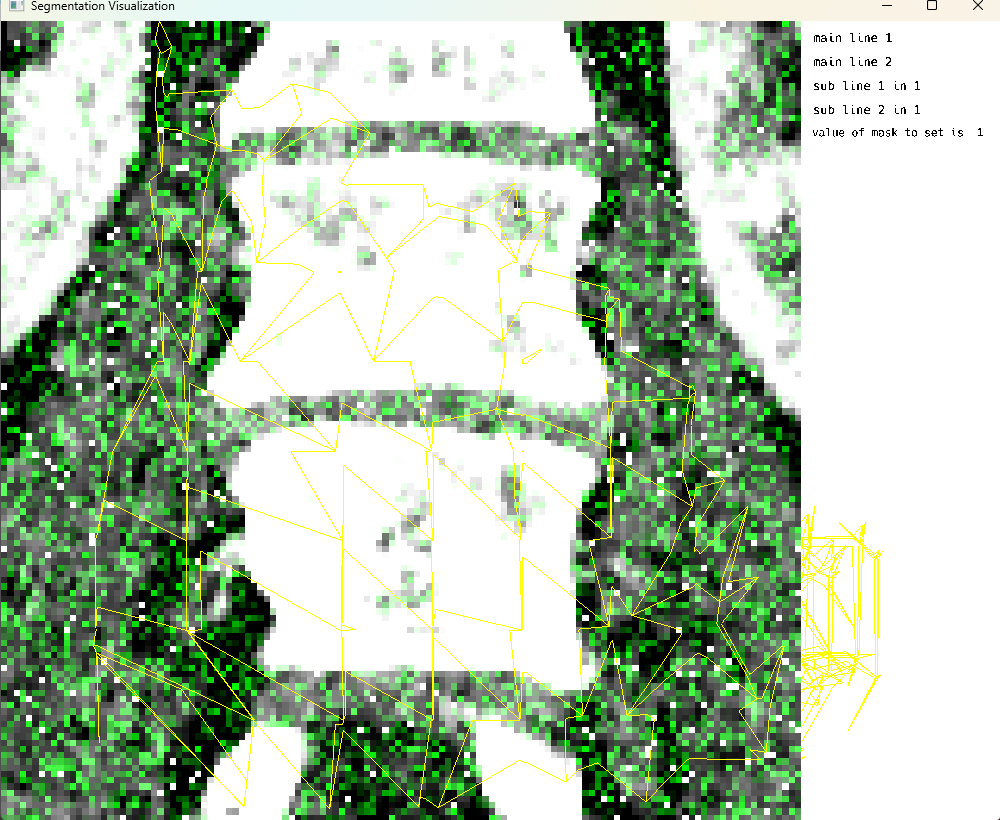

In [7]:
using MedEye3d
# Supervoxels
# For conversion of h5 to nifti
MedEye3d.ShadersAndVerticiesForSupervoxels.populateNiftiWithH5(ctNiftiImage, h5File, h5NiftiImage)

# for visualization
supervoxelDict = MedEye3d.ShadersAndVerticiesForSupervoxels.processVerticesAndIndicesForSv(h5File, "tetr_dat")
medEyeStruct = MedEye3d.SegmentationDisplay.displayImage(h5ImageArg; all_supervoxels=supervoxelDict)

# For modification of display data
displayData = MedEye3d.DisplayDataManag.getDisplayedData(medEyeStruct, [Int32(1), Int32(2)]) #passing the active texture number
#we need to check if the return type of the displayData is a single Array{Float32,3} or a vector{Array{Float32,3}}
# now in this case we are setting random noise over the manualModif Texture voxel layer, and the manualModif texture defaults to 2 for active number
displayData[2][:, :, :] = randn(Float32, size(displayData[2]))
@info "look here" typeof(displayData)
MedEye3d.DisplayDataManag.setDisplayedData(medEyeStruct, displayData)

[ Info: Successfully created new NIfTI file at D:/mingw_installation/home/hurtbadly/Downloads/hdf5.nii.gz
[ Info: Generating supervoxels for axis 1
[ Info: Generating supervoxels for axis 2
[ Info: Generating supervoxels for axis 3
[ Info: Supervoxels generated for all axes


Dict{Symbol, Any}(:gl_version => v"4.6.0", :gl_renderer => "NVIDIA GeForce GTX 1650 SUPER/PCIe/SSE2", :glsl_version => v"4.60.0", :gl_vendor => "NVIDIA Corporation")


[ Info: !! Crosshair rendering is currently only supported in Multi image display mode !!
┌ Warning: Font initialization failed, disabling text rendering: MethodError(FreeTypeAbstraction.FTFont, (), 0x000000000000690a)
└ @ MedEye3d.ForDisplayStructs D:\mingw_installation\home\hurtbadly\Desktop\julia_stuff\sota_medeye\MedEye3d.jl\src\structs\ForDisplayStructs.jl:162
[ Info: Program going in sleep
[ Info: Program out of sleep
┌ Info: look here
└   typeof(displayData) = Vector{Array{Float32, 3}} (alias for Array{Array{Float32, 3}, 1})


MedEye3d.ForDisplayStructs.CustomDisplayedVoxels
  voxelData: Array{Array{Float32, 3}}((2,))


## Single Image Mode: Overlaid Studies

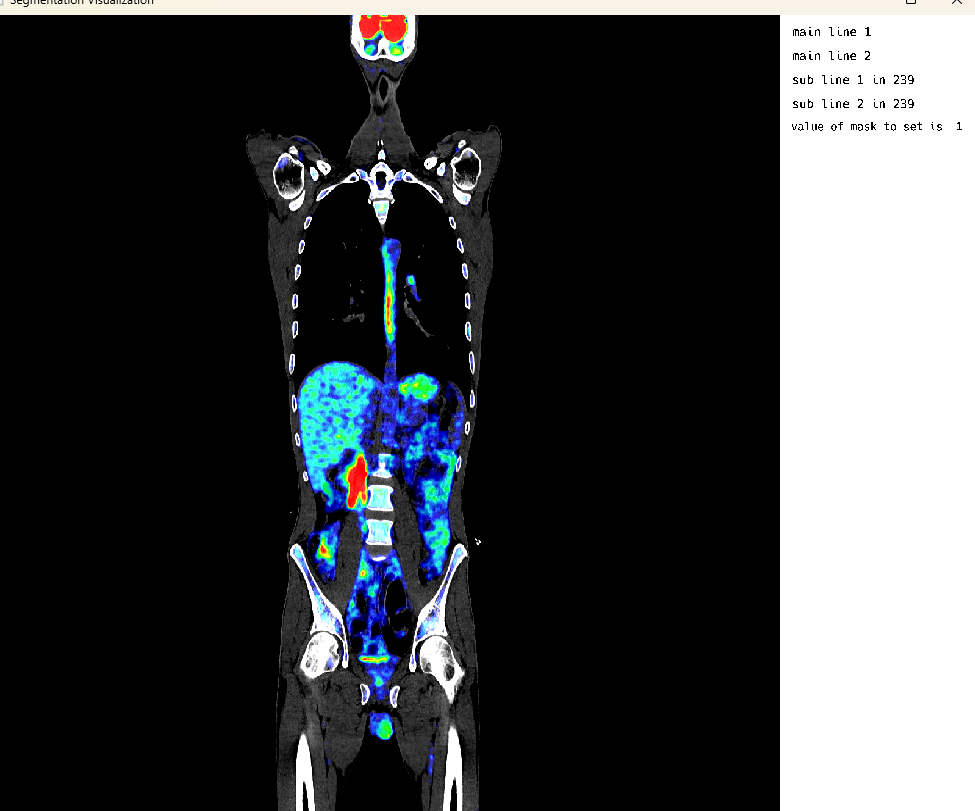

In [8]:
using MedEye3d
medEyeStruct = MedEye3d.SegmentationDisplay.displayImage(petOverlaidImagesArg)

[ Info: Loading overlaid images using ITK-style workflow
[ Info: Loading CT: D:/mingw_installation/home/hurtbadly/Downloads/ct_soft_pat_3_sudy_0.nii.gz
[ Info: Loading PET: D:/mingw_installation/home/hurtbadly/Downloads/pet_orig_pat_3_sudy_0.nii.gz
[ Info: CT size from SITK: (512, 512, 976)
[ Info: PET size from SITK: (200, 200, 488)
[ Info: CT spacing from SITK: (0.9765625, 0.9765625, 1.0)
[ Info: PET spacing from SITK: (4.0728302001953125, 4.0728302001953125, 2.0)
[ Info: Resampling PET to CT space...
[ Info: Final CT size: (512, 512, 976)
[ Info: Final PET size: (512, 512, 976)
[ Info: Fixed PET texture numb to 3
[ Info: Fixed PET range to: Float32[0.13950741, 3457.534]


Dict{Symbol, Any}(:gl_version => v"4.6.0", :gl_renderer => "NVIDIA GeForce GTX 1650 SUPER/PCIe/SSE2", :glsl_version => v"4.60.0", :gl_vendor => "NVIDIA Corporation")


[ Info: !! Crosshair rendering is currently only supported in Multi image display mode !!
┌ Warning: Font initialization failed, disabling text rendering: MethodError(FreeTypeAbstraction.FTFont, (), 0x000000000000690a)
└ @ MedEye3d.ForDisplayStructs D:\mingw_installation\home\hurtbadly\Desktop\julia_stuff\sota_medeye\MedEye3d.jl\src\structs\ForDisplayStructs.jl:162


MedEye3d.ForDisplayStructs.MainMedEye3d
  channel: Channel{Any}
  voxelArrayShapes: Array{Tuple{Int64, Int64, Int64}}((3,))
  voxelArrayTypes: Array{Any}((3,))
  textDispObj: MedEye3d.ForDisplayStructs.ForWordsDispStruct
  states: Array{MedEye3d.ForDisplayStructs.StateDataFields}((0,))
  displayMode: MedEye3d.ForDisplayStructs.DisplayMode MedEye3d.ForDisplayStructs.SingleImage


## Multi Image Mode: Crosshair rendering

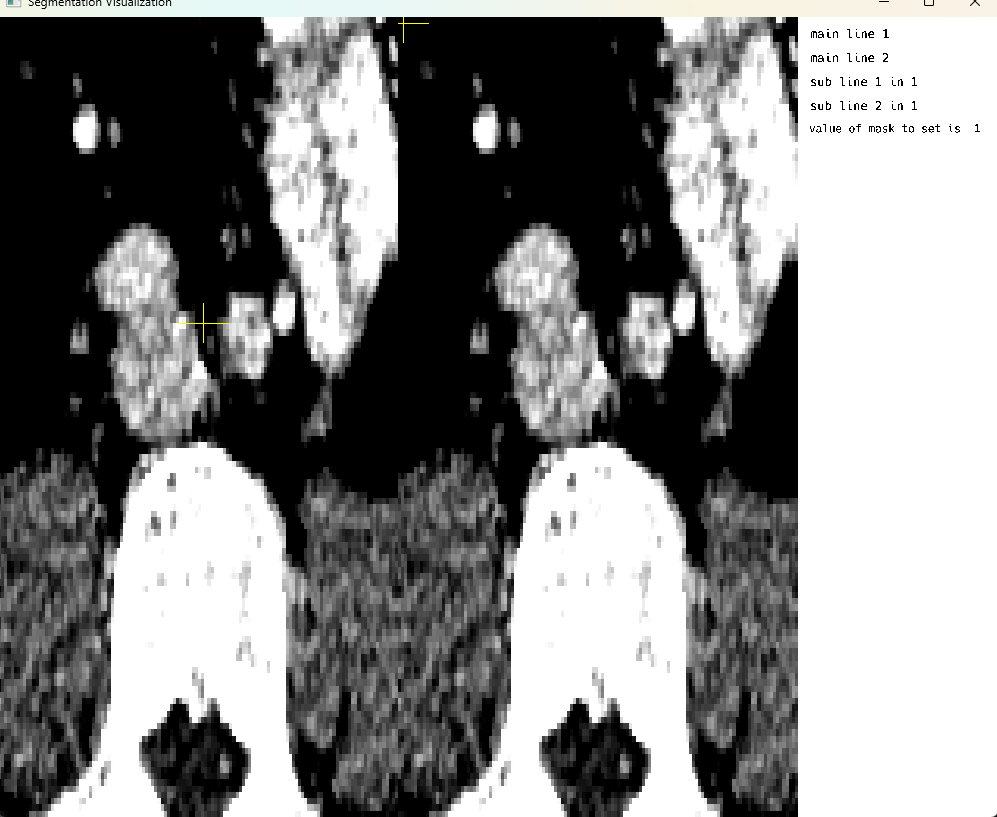

In [10]:
using MedEye3d
medEyeStruct = MedEye3d.SegmentationDisplay.displayImage(h5ImagesArg) #multi image displays

Dict{Symbol, Any}(:gl_version => v"4.6.0", :gl_renderer => "NVIDIA GeForce GTX 1650 SUPER/PCIe/SSE2", :glsl_version => v"4.60.0", :gl_vendor => "NVIDIA Corporation")


[ Info: !! On Screen Voxel modification is currently only supported in Single image display mode !!
┌ Warning: Font initialization failed, disabling text rendering: MethodError(FreeTypeAbstraction.FTFont, (), 0x000000000000690a)
└ @ MedEye3d.ForDisplayStructs D:\mingw_installation\home\hurtbadly\Desktop\julia_stuff\sota_medeye\MedEye3d.jl\src\structs\ForDisplayStructs.jl:162
┌ Warning: Font initialization failed, disabling text rendering: MethodError(FreeTypeAbstraction.FTFont, (), 0x000000000000690a)
└ @ MedEye3d.ForDisplayStructs D:\mingw_installation\home\hurtbadly\Desktop\julia_stuff\sota_medeye\MedEye3d.jl\src\structs\ForDisplayStructs.jl:162


MedEye3d.ForDisplayStructs.MainMedEye3d
  channel: Channel{Any}
  voxelArrayShapes: Array{Tuple{Int64, Int64, Int64}}((0,))
  voxelArrayTypes: Array{Any}((0,))
  textDispObj: MedEye3d.ForDisplayStructs.ForWordsDispStruct
  states: Array{MedEye3d.ForDisplayStructs.StateDataFields}((0,))
  displayMode: MedEye3d.ForDisplayStructs.DisplayMode MedEye3d.ForDisplayStructs.MultiImage
